### J'ai essayé avec une 2éme solution des Séparatrices à Vaste Marge (SVM)

#### Importer les packages

In [163]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm
from random import Random


# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

# Pickle package
import pickle

In [164]:
df1 = pd.read_csv('New_Data_Set.csv')
df1.head()

,Numéro de mesure,Longitude,Latitude,Position,Insee,Adresse,Complément,Code postal,Commune,Date de mesure,Mesure réalisée,Rapport,Conformité de la mesure,target,Niveau global,Type d'environnement,Laboratoire
0,175,3.91611,43.58528,"03° 54' 58.00'' Est, 43° 35' 07.00'' Nord",34129,Mas de Gau,NaN,34970,LATTES,06/12/2001,En extérieur,FicheMesure175.pdf,Oui,1,0.23,Divers,SATELIT
1,180,4.04194,43.64694,"04° 02' 31.00'' Est, 43° 38' 49.00'' Nord",34176,5539 Rue Lou Claou de la Oulivettas,NaN,34130,MUDAISON,06/12/2001,En extérieur,FicheMesure180.pdf,Oui,1,0.22,Divers,SATELIT
2,543,3.03167,43.36028,"03° 01' 54.00'' Est, 43° 21' 37.00'' Nord",34225,Chemin de Montfaucon,résidence de Mme SOUTADE,34620,PUISSERGUIER,23/05/2002,En extérieur,FicheMesure543.pdf,Oui,1,0.54,Divers,APAVE
3,545,3.03278,43.36167,"03° 01' 58.00'' Est, 43° 21' 42.00'' Nord",34225,Chemin de Quarante,résidence de M. GONZALEZ,34620,PUISSERGUIER,23/05/2002,En extérieur,FicheMesure545.pdf,Oui,1,5.55,Divers,APAVE
4,850,3.56444,43.64583,"03° 33' 52.00'' Est, 43° 38' 45.00'' Nord",34114,480 Chemin de Pioch Courbi,Chez Mme et M. GALOIS,34150,GIGNAC,10/10/2002,En extérieur,FicheMesure850.pdf,Oui,0,6.89,Rue / Route / Parking,APAVE


#### Preparer les données

In [166]:
df1.rename(columns={'Niveau global': 'Niveau_global'}, inplace=True)

In [152]:
def target():
    for t in range(0,len(df)):
        if df['Niveau_global'][t] > 6 : 
            df['target'][t] = 0
            print(df['Niveau_global'][t]) 

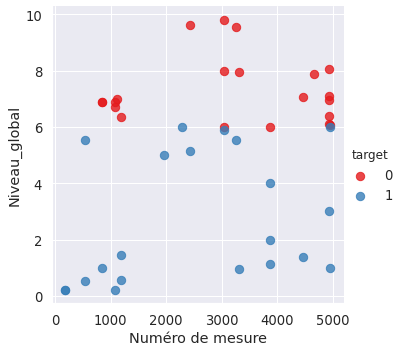

In [153]:

sns.lmplot('Numéro de mesure', 'Niveau_global', data=df1, hue='target',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});


#### La couleur rouge pour les valeurs qui sont supérieur à 6 et la couleur bleu  pour les valeurs qui sont  inférieur à 6 


In [154]:
df1.columns # cette ligne permet d'obtenir les différentes colonnes que j'ai dans Dataset.

Index(['Numéro de mesure', 'Longitude', '    Latitude', 'Position', 'Insee',
       'Adresse', 'Complément', 'Code postal', 'Commune', 'Date de mesure',
       'Mesure réalisée', 'Rapport', 'Conformité de la mesure', 'target',
       'Niveau_global', 'Type d'environnement', 'Laboratoire'],
      dtype='object')

In [155]:
#pd.crosstab(df1.target, "freq") 
df1['target'].value_counts()

1    21
0    21
Name: target, dtype: int64

In [156]:
#df2 = df1[df1['Niveau_global']==1][0:10]
#df3 = df1[df1['Niveau_global']==0][0:10]

In [158]:
Z=df1[['Numéro de mesure','Niveau_global']].to_numpy()
print(Z)
z=df1['target'].to_numpy()
print(z)

[[1.75000e+02 2.30000e-01]
 [1.80000e+02 2.20000e-01]
 [5.43000e+02 5.40000e-01]
 [5.45000e+02 5.55000e+00]
 [8.50000e+02 6.89000e+00]
 [8.51000e+02 6.90000e+00]
 [8.52000e+02 9.90000e-01]
 [1.07200e+03 6.70000e+00]
 [1.07300e+03 2.20000e-01]
 [1.07400e+03 6.88000e+00]
 [1.11500e+03 6.99000e+00]
 [1.19300e+03 6.35000e+00]
 [1.19400e+03 1.47000e+00]
 [1.19500e+03 5.70000e-01]
 [1.95500e+03 5.00000e+00]
 [2.28600e+03 5.99999e+00]
 [2.42800e+03 9.63000e+00]
 [2.42900e+03 5.16000e+00]
 [3.04300e+03 6.01000e+00]
 [3.04500e+03 9.80000e+00]
 [3.04600e+03 5.88000e+00]
 [3.04700e+03 8.00000e+00]
 [3.26100e+03 9.55000e+00]
 [3.26300e+03 5.55000e+00]
 [3.30900e+03 7.95000e+00]
 [3.31000e+03 9.50000e-01]
 [3.87600e+03 4.00000e+00]
 [3.87700e+03 1.12000e+00]
 [3.87800e+03 2.00000e+00]
 [3.87900e+03 6.00000e+00]
 [4.46700e+03 1.39000e+00]
 [4.46800e+03 7.06000e+00]
 [4.66400e+03 7.88000e+00]
 [4.93000e+03 6.10000e+00]
 [4.93100e+03 6.38000e+00]
 [4.93200e+03 7.11000e+00]
 [4.93300e+03 3.00000e+00]
 

In [159]:
y1_predict=classifier.predict(Z)
print(y1_predict)

[1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1
 0 0 1 1 1]


#### Le model SVM

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
#X_train.shape

#### Séparatrices à Vaste Marge (anglais : Support Vector Machine, SVM)

#### <font color='blue'>Problème de classification, SVM : C'est quoi ?</font>

Considérons la figure ci dessus. On se place dans le plan, et l’on dispose de deux catégories : les ronds rouges et les ronds bleus, chacune occupant une région différente du plan. Cependant, la frontière entre ces deux régions n’est pas connue. Ce que l’on veut, c’est que quand on lui présentera un nouveau point dont on ne connaît que la position dans le plan, l’algorithme de classification sera capable de prédire si ce nouveau point est un rond rouge ou un rond bleu.

Voici notre problème de classification : pour chaque nouvelle entrée, être capable de déterminer à quelle catégorie cette entrée appartient.
Autrement dit, il faut être capable de trouver la frontière entre les différentes catégories. Si on connaît la frontière, savoir de quel côté de la frontière appartient le point, et donc à quelle catégorie il appartient.

Le SVM est une solution à ce problème de classification1. Le SVM appartient à la catégorie des classificateurs linéaires (qui utilisent une séparation linéaire des données), et qui dispose de sa méthode à lui pour trouver la frontière entre les catégories.

Pour que le SVM puisse trouver cette frontière, il est nécessaire de lui donner des données d’entraînement. En l’occurrence, on donne au SVM un ensemble de points, dont on sait déjà si ce sont des carrés rouges ou des ronds bleus, comme dans la Figure 1. A partir de ces données, le SVM va estimer l’emplacement le plus plausible de la frontière : c’est la période d'entraînement, nécessaire à tout algorithme d’apprentissage automatique.

Une fois la phase d’entraînement terminée, le SVM a ainsi trouvé, à partir de données d’entraînement, l’emplacement supposé de la frontière. En quelque sorte, il a « appris » l’emplacement de la frontière grâce aux données d’entraînement. Qui plus est, le SVM est maintenant capable de prédire à quelle catégorie appartient une entrée qu’il n’avait jamais vue avant, et sans intervention humaine : c’est là tout l’intérêt de l’apprentissage automatique.

https://zestedesavoir.com/tutoriels/1760/un-peu-de-machine-learning-avec-les-svm/#1-probleme-de-classification-svm-vous-pouvez-repeter-la-question


In [167]:
from sklearn import svm 

classifier = svm.SVC(kernel='linear' , gamma='auto' , C=2)
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

In [162]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

classification_report(y_test, y_predict)

print(confusion_matrix(z,y1_predict))
print(classification_report(z,y1_predict))
print(accuracy_score(z, y1_predict))

[[17  4]
 [ 0 21]]
              precision    recall  f1-score   support

           0       1.00      0.81      0.89        21
           1       0.84      1.00      0.91        21

    accuracy                           0.90        42
   macro avg       0.92      0.90      0.90        42
weighted avg       0.92      0.90      0.90        42

0.9047619047619048


### Avec une Dataset équilibré , j'obtient une précision de 90%.